<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Herramientas%20de%20Modelaci%C3%B3n/ProyectoModulo1_Sarmiento%2C_Osorio_%26_Mora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto módulo 1
|Nombre|correo|
|--|--|
|Aixa Alexandra Sarmiento Tovar | aixasato@unisabana.edu.co|
|Angie Viviana Osorio Castellanos | angieosca@unisabana.edu.co|
|David Esteban Mora Meza | davidmorme@unisabana.edu.co|




## Objetivo
   Aplicar las técnica aprendidas durante el módulo a un problema
   aplicado donde el estudiante pueda situarse en un contexto,
   seleccionar e implementar la mejor manera de resolver un problema. 

## Entregable
   Este mismo notebook de ipython con los códigos y los resultados.

## Enunciado
   El modelo SIR se aplica al modelamiento de la propagación de epidemmias. Fue
   formulado por  Kermack y McKendric y se ha usado como base para
   muchos estudios epidemiológicos. El modelo puede ser extendido para
   ser aplicado a otros sistemas, por ejemplo con periodos de
   incubación de la enfermedad. 

   En la formulación más sencilla se asume que en una población dada
   existen tres tipos de habitantes: Susceptibles ($S$), Infectados
   ($I$), y recuperados ($R$) (de ahí el nombre SIR). La población
   total es constante e igual a $N = S + I + R$.  La evolución de
   la población se escribe como 
   \begin{align}
   \frac{dS}{dt} &= -\beta IS, \\
   \frac{dI}{dt} & = \beta IS - \gamma I, \\
   \frac{dR}{dt} &= \gamma I,
   \end{align}
   donde $\beta$ representa lo análogo a la intensidad de  infección
   de la epidemia, $\gamma$ la intensidad de cura, y ahora los valores de $S, I, R$ se interpretan como la fracción de la población suceptible, infectada, y removida, respectivamente. Al final, el
   parámetro $\omega = \frac{\beta}{\gamma}$ será muy importante ya que
   dominará completamente la dinámica de infección. Por ejemplo, si
   $\omega > 1.0/S(0)$, se tendrá una epidemia, mientras que en caso
   contrario no. 



## Solución numérica
Tome $S(0) = 0.995$, $I(0) = 0.005, R(0) = 1 - S(0) - I(0)$. 
1. Resuelva el sistema usando la función `solve_ivp` de `scipy`. Use los siguientes valores para los parámetros : $\beta = 0.1$, $\omega = 6.8$. Dibuje, en la misma figura, $S, I, R$ como función del tiempo. Se obtiene epidemia? Esto indica también que aunque la tasa de infección sea baja como en este problema, y haya muy pocos infectados (5 en 1000, puede ser porque introducen la enfermedad o porque son antivacunas) puede ocurrir una epidemia. Experimente variando a $\omega$.    


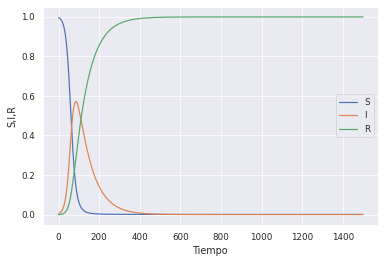

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("paper")

S0=0.995
I0=0.005
R0=1-S0-I0

beta=0.1
omega=6.8
gamma=beta/omega

#y[0]=S; y[1]=I; y[2]=R 
def fderiv(t, y):
  return np.array([-beta*y[1]*y[0] , beta*y[1]*y[0] - gamma*y[1] , gamma*y[1]])

TF=1500
DT=5
sol=solve_ivp(fderiv, t_span=[0,TF],y0=[S0, I0, R0],t_eval=np.arange(0, TF+DT, DT))

fig, ax = plt.subplots()
ax.plot(sol.t,sol.y[0],label='S')
ax.plot(sol.t,sol.y[1],label='I')
ax.plot(sol.t,sol.y[2],label='R')
ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel('S,I,R')
fig.show()

In [ ]:
if omega > 1/S0:
  print('Epidemia')
else:
  print('No epidemia')

Epidemia


> **Análisis:**
Siguiendo este modelo SIR, se puede evidenciar que el pico de población infectada es del 57.21% en el tiempo 85. Asimismo, se observa que, determinado tiempo después, la tasa de susceptibles disminuye hasta llegar a cero y la tasa de recuperados se dispara hasta llegar al 100%. Sin embargo, este modelo puede no ser muy representativo de la realidad ya que ignora que hay personas que pueden infectarse de nuevo luego de cierto tiempo de haberse recuperado.
 Adicionalmente, con el parámetro ω se evidencia que la intensidad de infección es considerablemente mayor que la intensidad de cura. Es por esto que se presenta una epidemia.


2. Dibuje el espacio de fase $S$ versus $I$. 

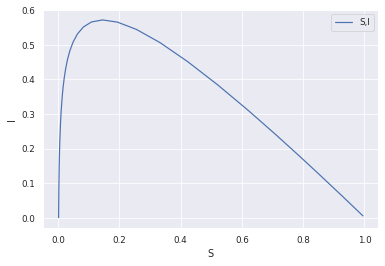

In [ ]:
fig, ax = plt.subplots()
ax.plot(sol.y[0],sol.y[1],label='S,I')
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.legend()
fig.show()

**Análisis:** En la gráfica podemos evidenciar la proporción de infectados vs la de susceptibles en cada momento en el tiempo evaluado, vemos que en el tiempo 0 el valor de susceptibles inicia en 1 (a la derecha de la gráfica), y comienza a disminuir de forma lineal e inversamente proporcional a los infectados hasta llegar a su punto máximo, en el que al no haber reinfección de la población estos valores llegan rápidamente a 0, estando toda la población en recuperados.

3. Como puede ver, hay una fuerte dependencia entre $\omega$ y el valor final de $S_{fin}$ (personas que no se infectaron), y el valor máximo de infectados $I_{\max}$. Realice una gráfica que muestre cómo dependen estos valores respecto a $\omega = [0.5, 1.0, 1.5, 2.0, 2.5, \ldots , 10.0]$. Debe obtener algo como lo que se muestra a continuación.

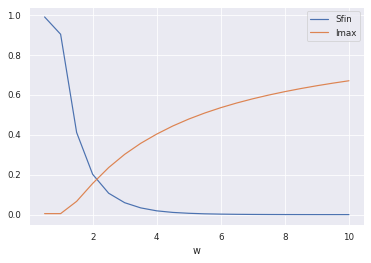

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

S0=0.995
I0=0.005
R0=1-S0-I0

beta=0.1
TF=1500
DT=5

omegas=np.arange(0.5,10.1,0.5)
Sfin=np.zeros(len(omegas))
Imax=np.zeros(len(omegas))

for i in range(0, len(omegas)):
  gamma=beta/omegas[i]
  def fderiv(t, y):
    return np.array([-beta*y[1]*y[0] , beta*y[1]*y[0] - gamma*y[1] , gamma*y[1]])
  
  sol=solve_ivp(fderiv, t_span=[0,TF],y0=[S0, I0, R0],t_eval=np.arange(0, TF+DT, DT))
  Sfin[i]=sol.y[0][-1]
  Imax[i]=max(sol.y[1])

fig, ax = plt.subplots()
ax.plot(omegas,Sfin,label='Sfin')
ax.plot(omegas,Imax,label='Imax')
ax.legend()
ax.set_xlabel('w')
fig.show()

> **Análisis:** Si se tiene valores de omega pequeños, la cantidad de población susceptible es alta. Por otro lado, a medida que el valor de omega aumenta, la población infectada tiende a crecer, esto debido a que la intensidad de infección sería mayor comparada con la intensidad de cura.

## Modificación al modelo
Suponga que después de recuperarse existe una cierta probablidad de que la persona se vuelva a infectar. Imagine que este mecanismo de reinfección puede calcularse como $\rho R$, donde $\rho$ es la tasa de reinfección. Modifique el modelo e incluya $\rho = 0.03$. 
1. Escriba cómo sería el modelo ahora y cuáles son los valores finales para $S, I, R$ en términos de los parámetros $\beta, \gamma, \rho$:



La población se escribe como 
   \begin{align}
   \frac{dS}{dt} &= -\beta IS, \\
   \frac{dI}{dt} & = \beta IS - \gamma I + \rho R, \\
   \frac{dR}{dt} &= \gamma I - \rho R,
   \end{align}

2. Implemente y resuelva para los valores que se usaron en la primera parte

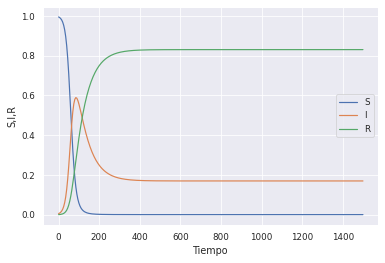

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

S0=0.995
I0=0.005
R0=1-S0-I0

beta=0.1
omega=6.8
gamma=beta/omega
rho=0.003

#y[0]=S; y[1]=I; y[2]=R 
def fderiv(t, y):
  return np.array([-beta*y[1]*y[0] , beta*y[1]*y[0] - gamma*y[1] + rho*y[2] , gamma*y[1] - rho*y[2]])
TF=1500
DT=5
sol=solve_ivp(fderiv, t_span=[0,TF],y0=[S0, I0, R0],t_eval=np.arange(0, TF+DT, DT))

fig, ax = plt.subplots()
ax.plot(sol.t,sol.y[0],label='S')
ax.plot(sol.t,sol.y[1],label='I')
ax.plot(sol.t,sol.y[2],label='R')
ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel('S,I,R')
fig.show()


> **Análisis:**
El punto máximo de personas infectadas es de 58.91% siendo solo un 1.7% adicional que el modelo base, sin embargo, la mayor diferencia está es en el estado estacionario. Teniendo que en el estado estacionario del modelo base los infectados son 0% y en el modificado es 16.95%. Adicionalmente, se observa que el número de personas recuperadas se mantiene en 83.05%, mientras el número de personas susceptibles es cero dado que al ser una epidemia todos se infectan. Lo anterior, significaría que el virus permanecería en la población de manera estacionaria pero sin detonar picos.

## Raíz: Valor de $\rho$ para que $I_{fin} < 0.2$
Suponga que usted puede relizar un tratamiento médico para minimizar un poco la probabilidad de re-infección. Es decir, puede controlar $\rho$. Pero por cuestiones de presupuesto y cobertura no puede volverlo 0.0. Entonces decide que debe aceptar que haya un máximo de 20% de población infectada cuando se llega al estado estacionario. Cuál debe ser el valor máximo de $\rho$ para  que el valor final de infectados sea por mucho 20%? 
1. Calcule este valor de forma teórica y escriba acá el resultado:
Básandose en la ecuación de la derivada de I con respecto a t, 
\begin{align}
\frac{dI}{dt} & = \beta IS - \gamma I + \rho R, \\
\end{align}
Conociendo que la derivada con respecto al tiempo en el estado estacionario sería 0 y asimismo que por el valor de $\omega$ siendo que estamos en una pandemia, los suceptibles en el estado estacionario también serían 0 obtenemos:
\begin{align}
\ \gamma I = \rho R, \\
\end{align}
como R es el complemento de I, obtenemos que:
\begin{align}
\ \rho = \frac{\gamma I}{1-I} , \\
\end{align}
Remplazando:
\begin{align}
\rho maxTeo = 1/272 = 0.0036764705882352945
\end{align}

In [ ]:
ImaxEsp=0.2 #Infectados máximo esperado
rhomax=gamma*ImaxEsp/(1-ImaxEsp)
print('Según el cálculo teórico, el valor máximo que puede tomar Rho es: ',rhomax)

Según el cálculo teórico, el valor máximo que puede tomar Rho es:  0.0036764705882352945


2. Formule el problema en términos de una búsqueda de raices y calcule $\rho$ de forma numérica. Compare con la predicción teórica. 
> Bloc con sangría
Bucando despejar $I$ de la misma ecuación:
\begin{align}
\ \gamma I = \rho (1-I), \\
\end{align}
\begin{align}
\ I(\gamma+\rho)= \rho, \\
\end{align}
\begin{align}
\ I = \frac{\rho}{\gamma+\rho}, \\
\end{align}
Para encontrar el punto de corte en 20%:
\begin{align}
\ \frac{\rho}{\gamma+\rho}-0.2=0, \\
\end{align}
\begin{align}
\rho maxNum = 0.003676470588235256
\end{align}

El error entre el cálculo númerico y el teórico es de: 1.0498546476611635e-14

In [ ]:
from scipy import optimize # use the optimize module
import numpy as np # for data array

def fun(rho):
  return rho/(gamma+rho)-0.2

sol = optimize.root(fun, [0], method='hybr')

print(sol)

    fjac: array([[-1.]])
     fun: array([-1.69309011e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.55346721e-10])
       r: array([-43.52011145])
  status: 1
 success: True
       x: array([0.00367647])


In [ ]:
print("Según el cálculo númerico, el valor máximo que puede tomar Rho es: ", sol.x[0])

Según el cálculo númerico, el valor máximo que puede tomar Rho es:  0.003676470588235256


In [ ]:
print(f"El error entre el cálculo númerico y el teórico es de: {abs(rhomax-sol.x[0])/rhomax}")

El error entre el cálculo númerico y el teórico es de: 1.0498546476611635e-14
